In [10]:
import pandas as pd
import numpy as np 
import ast
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data.csv')

Enter the desired rating start:  3000
Enter the desired rating end:  4000


Filtered 'tags' column:
8       ['divide and conquer', 'dp', 'number theory', ...
59                 ['combinatorics', 'dp', 'fft', 'math']
60         ['constructive algorithms', 'data structures']
61                                 ['hashing', 'strings']
140     ['brute force', 'dp', 'fft', 'math', 'number t...
                              ...                        
8254                                         ['geometry']
8271    ['binary search', 'data structures', 'divide a...
8302                                         ['geometry']
8332                                    ['combinatorics']
8685                           ['math', 'shortest paths']
Name: tags, Length: 628, dtype: object


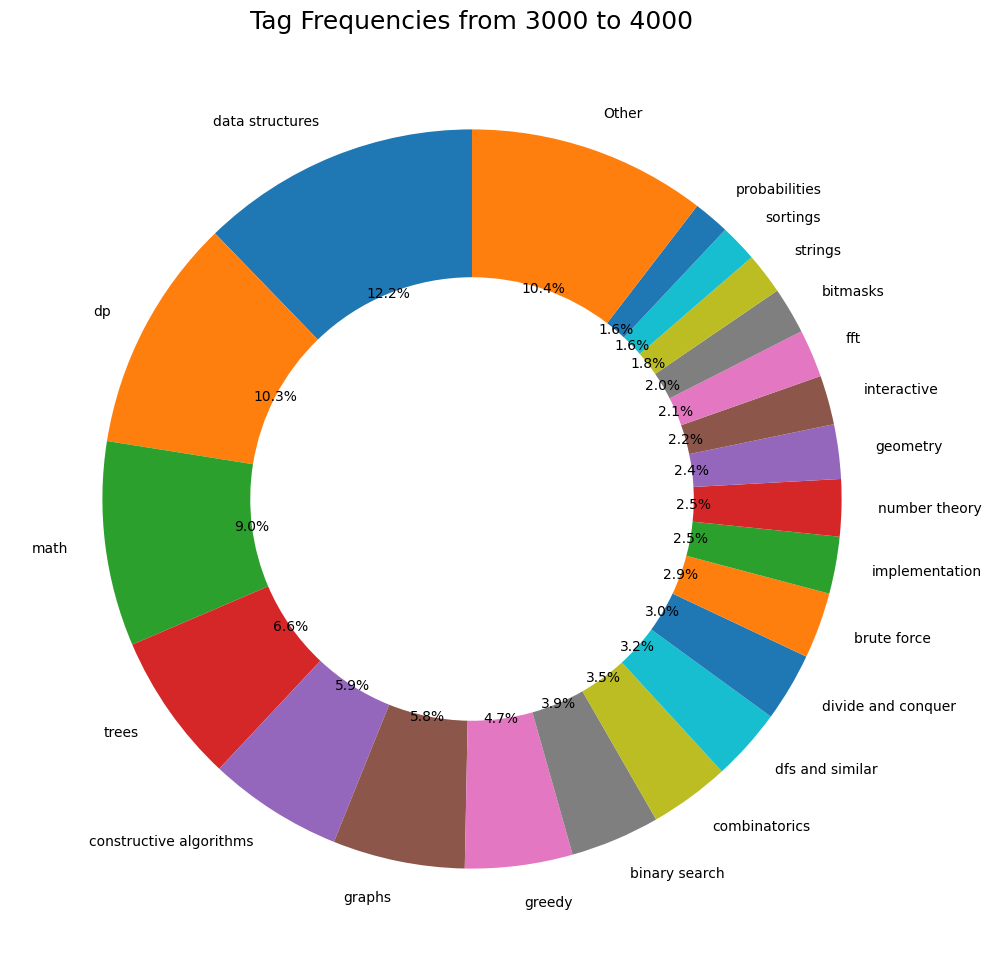

In [119]:
desired_rating_start = float(input("Enter the desired rating start: "))
desired_rating_end = float(input("Enter the desired rating end: "))
numeric_ratings = pd.to_numeric(df['rating'], errors='coerce')
filtered_df = df[~numeric_ratings.isna()]

# Use loc to filter based on the desired rating range
filtered_df = filtered_df.loc[
    (numeric_ratings >= desired_rating_start) & (numeric_ratings <= desired_rating_end)
]

# Print information about the 'tags' column in the filtered DataFrame
print("Filtered 'tags' column:")
print(filtered_df['tags'])

# Step 2: Extract and flatten the tags
tags_list = filtered_df['tags'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
flat_tags = [tag for sublist in tags_list for tag in sublist]

# Check if there are no tags or all tags are NaN
if not flat_tags:
    print("No valid tags found in the 'tags' column.")
else:
    # Step 3: Count the frequency of each tag
    tag_counts = pd.Series(flat_tags).value_counts()

    # Combine low-frequency tags into a single category called 'Other'
    threshold = len(filtered_df)/25 # You can adjust this threshold as needed
    low_frequency_tags = tag_counts[tag_counts < threshold].index
    tag_counts_combined = tag_counts.copy()
    tag_counts_combined['Other'] = tag_counts_combined[tag_counts_combined < threshold].sum()
    tag_counts_combined = tag_counts_combined.drop(low_frequency_tags)

    # Check if there are valid tags to plot
    if not tag_counts_combined.empty:
        # Step 4: Plot the frequencies as a pie chart
        plt.figure(figsize=(20, 12))
        pie_chart = tag_counts_combined.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
        pie_chart.set_title('Tag Frequencies from ' + str(round(desired_rating_start)) + " to " + str(round(desired_rating_end)), fontsize=18)
        pie_chart.set_ylabel('')  # Remove the default ylabel
        pie_chart.tick_params(axis='both', labelsize=12)  # Adjust the font size for labels
        plt.show()
    else:
        print("No valid tags found. Cannot generate a pie chart.")